Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs

Dataset

In [ ]:
def criaDatasetDificil(n=100, centers=10, std=0.5):
    X, y = make_blobs(n_samples=n, centers=centers, cluster_std=std)
    y = sign(np.array(y%2, dtype=int)*2-1)
    return X, y

Funções de Ativação

In [ ]:
def sign(a):
    return (a>=0)*2-1

def sigmoid(x, derivative=False):
    if derivative:
        sig = 1 / (1 + np.exp(-x))
        return sig * (1 - sig)
    return 1 / (1 + np.exp(-x))

def relu(x, derivative=False):
    if derivative:
        return np.where(x > 0, 1, 0)
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

Plotting

In [ ]:
def defineAxes(X):
    offset = 0.5
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]

def plotDataset(X, y):
  plt.scatter(X[:,0], X[:,1],c=y)

def plotPredictions(clf, X):
    axes = defineAxes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

MLP - Scikit Learn

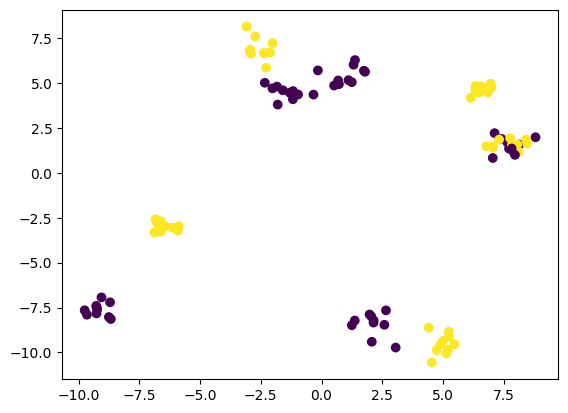

In [ ]:
X,y = criaDatasetDificil()

plotDataset(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8)

mlp = MLPClassifier(hidden_layer_sizes=(8),max_iter=1500)

MLP - Implementação Manual

In [ ]:
class MLP:
    def __init__(self, layers, activation_functions, epochs, learning_rate):
        self.layers = layers
        self.activation_functions = activation_functions
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []
        self.initialize_weights()

    def initialize_weights(self):
        np.random.seed(42)
        for i in range(len(self.layers) - 1):
            self.weights.append(np.random.uniform(size=(self.layers[i], self.layers[i + 1])))
            self.biases.append(np.random.uniform(size=(1, self.layers[i + 1])))

    def forward(self, X):
        activations = [X]
        for i in range(len(self.weights)):
            net_input = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            activation = self.activation_functions[i](net_input)  # Corrigido aqui
            activations.append(activation)
        return activations

    def backward(self, activations, y):
        deltas = [y.reshape(-1, 1) - activations[-1]]
        for i in reversed(range(len(self.weights))):
            derivative = self.activation_functions[i](activations[i + 1], derivative=True)  # Use derivada
            delta = deltas[-1] * derivative
            deltas.append(delta.dot(self.weights[i].T))
        deltas.reverse()
        return deltas

    def update_weights(self, activations, deltas):
        for i in range(len(self.weights)):
            self.weights[i] += activations[i].T.dot(deltas[i + 1]) * self.learning_rate
            self.biases[i] += np.sum(deltas[i + 1], axis=0, keepdims=True) * self.learning_rate

    def fit(self, X, y):
        for epoch in range(self.epochs):
            activations = self.forward(X)
            deltas = self.backward(activations, y)
            self.update_weights(activations, deltas)

    def predict(self, X):
        activations = self.forward(X)
        return (activations[-1] > 0.5).astype(int)

In [ ]:
layers = [2, 5, 1]
activation_functions = [relu, sigmoid]


nn = MLP(layers, activation_functions,  epochs=1500, learning_rate = 0.01)


y_pred_manual = nn.predict(X_test)

0.87


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


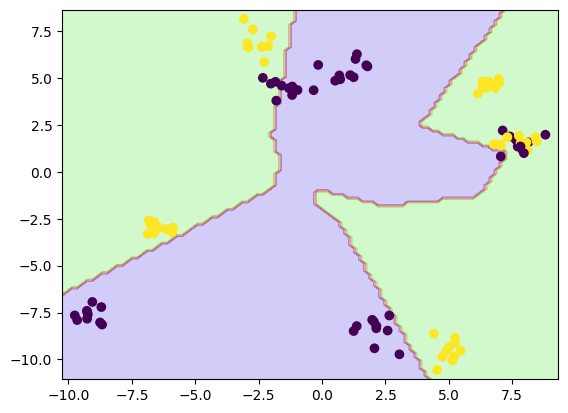

In [ ]:
mlp.fit(X_train, y_train)
print(accuracy_score(y, mlp.predict(X)))
plotPredictions(mlp, X)
plotDataset(X, y)
plt.show()


0.88


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


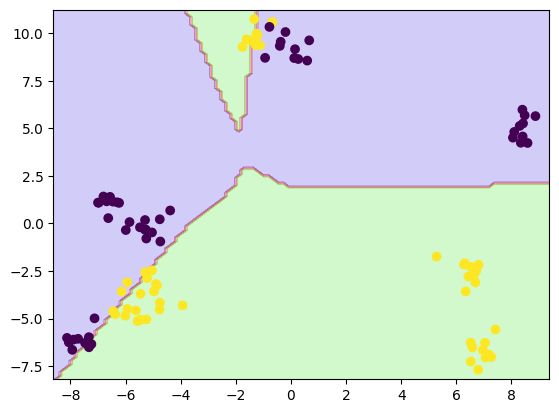

Acurácia da rede neural implementada: 0.6
Acurácia do MLPClassifier do scikit-learn: 0.7


In [ ]:
mlp.fit(X_train, y_train)
print(accuracy_score(y, mlp.predict(X)))
plotPredictions(mlp, X)
plotDataset(X, y)
plt.show()

accuracy_manual = accuracy_score(y_test, y_pred_manual)
print(f'Acurácia da rede neural implementada: {accuracy_manual}')

mlp = MLPClassifier(hidden_layer_sizes=(2,5,), max_iter=1500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_sklearn_nn = mlp.predict(X_test)
accuracy_sklearn_nn = accuracy_score(y_test, y_pred_sklearn_nn)
print(f'Acurácia do MLPClassifier do scikit-learn: {accuracy_sklearn_nn}')